<a href="https://colab.research.google.com/github/Ro-Cari/FATEC_CIENCIA_DADOS/blob/main/Grafo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools
from ortools.linear_solver import pywraplp

In [ ]:

# Dados do problema
start_nodes = [0, 0, 1, 1, 1, 2, 2, 3, 4]
end_nodes = [1, 2, 2, 3, 4, 3, 4, 4, 2]
capacities = [15, 8, 20, 4, 10, 15, 4, 20, 5]
unit_costs = [4, 4, 2, 2, 6, 1, 3, 2, 3]
supplies = [20, 0, 0, -5, -15]

# Número de nós
num_nodes = 5
num_arcs = len(start_nodes)

# Criar o solver
solver = pywraplp.Solver.CreateSolver('GLOP')

# Criar as variáveis de decisão x_ij para cada arco (i -> j)
x = []
for i in range(num_arcs):
    x.append(solver.NumVar(0, capacities[i], f'x_{start_nodes[i]}_{end_nodes[i]}'))

# Definir a função objetivo: minimizar o custo total
objective = solver.Objective()
for i in range(num_arcs):
    objective.SetCoefficient(x[i], unit_costs[i])
objective.SetMinimization()

# Restrições de conservação de fluxo para cada nó
for i in range(num_nodes):
    flow_balance = solver.Constraint(supplies[i], supplies[i])
    for j in range(num_arcs):
        if start_nodes[j] == i:
            flow_balance.SetCoefficient(x[j], 1)  # Fluxo saindo do nó i
        if end_nodes[j] == i:
            flow_balance.SetCoefficient(x[j], -1)  # Fluxo entrando no nó i

# Resolver o problema
status = solver.Solve()

# Verificar solução
if status == pywraplp.Solver.OPTIMAL:
    print("Solução ótima encontrada!")
    print(f"Custo total: {solver.Objective().Value()}")
    print("Fluxos:")
    for i in range(num_arcs):
        print(f"x_{start_nodes[i]}_{end_nodes[i]} = {x[i].solution_value()}")
else:
    print("Não foi possível encontrar uma solução ótima.")

Solução ótima encontrada!
Custo total: 150.0
Fluxos:
x_0_1 = 12.0
x_0_2 = 8.0
x_1_2 = 8.0
x_1_3 = 4.0
x_1_4 = 0.0
x_2_3 = 12.0
x_2_4 = 4.0
x_3_4 = 11.0
x_4_2 = 0.0


In [ ]:
"""From Bradley, Hax and Maganti, 'Applied Mathematical Programming', figure 8.1."""
import numpy as np

from ortools.graph.python import min_cost_flow


def main():
    """MinCostFlow simple interface example."""
    # Instantiate a SimpleMinCostFlow solver.
    smcf = min_cost_flow.SimpleMinCostFlow()

    # Define four parallel arrays: sources, destinations, capacities,
    # and unit costs between each pair. For instance, the arc from node 0
    # to node 1 has a capacity of 15.
    start_nodes = np.array([0, 0, 1, 1, 1, 2, 2, 3, 4])
    end_nodes = np.array([1, 2, 2, 3, 4, 3, 4, 4, 2])
    capacities = np.array([15, 8, 20, 4, 10, 15, 4, 20, 5])
    unit_costs = np.array([4, 4, 2, 2, 6, 1, 3, 2, 3])

    # Define an array of supplies at each node.
    supplies = [20, 0, 0, -5, -15]

    # Add arcs, capacities and costs in bulk using numpy.
    all_arcs = smcf.add_arcs_with_capacity_and_unit_cost(
        start_nodes, end_nodes, capacities, unit_costs
    )

    # Add supply for each nodes.
    smcf.set_nodes_supplies(np.arange(0, len(supplies)), supplies)

    # Find the min cost flow.
    status = smcf.solve()

    if status != smcf.OPTIMAL:
        print("There was an issue with the min cost flow input.")
        print(f"Status: {status}")
        exit(1)
    print(f"Minimum cost: {smcf.optimal_cost()}")
    print("")
    print(" Arc    Flow / Capacity Cost")
    solution_flows = smcf.flows(all_arcs)
    costs = solution_flows * unit_costs
    for arc, flow, cost in zip(all_arcs, solution_flows, costs):
        print(
            f"{smcf.tail(arc):1} -> {smcf.head(arc)}  {flow:3}  / {smcf.capacity(arc):3}       {cost}"
        )


if __name__ == "__main__":
    main()

Minimum cost: 150

 Arc    Flow / Capacity Cost
0 -> 1   12  /  15       48
0 -> 2    8  /   8       32
1 -> 2    8  /  20       16
1 -> 3    4  /   4       8
1 -> 4    0  /  10       0
2 -> 3   12  /  15       12
2 -> 4    4  /   4       12
3 -> 4   11  /  20       22
4 -> 2    0  /   5       0


In [ ]:
import pandas as pd
import numpy as np
from ortools.graph.python import min_cost_flow


def main():
    """Exemplo simples de interface MinCostFlow."""
    # Instanciar o resolvedor de Fluxo de Custo Mínimo.
    fluxo_custo_minimo = min_cost_flow.SimpleMinCostFlow()

    # Nós iniciais e finais das arestas (arcos)
    nos_iniciais = np.array([1, 1, 2, 2, 2, 3, 3, 4, 5])
    nos_finais = np.array([2, 3, 3, 4, 5, 4, 5, 5, 3])

    # Capacidades de cada arco
    capacidades = np.array([15, 8, 20, 4, 10, 15, 4, 20, 5])

    # Custos unitários de cada arco
    custos_unitarios = np.array([4, 4, 2, 2, 6, 1, 3, 2, 3])

    # Definir um array de fornecimento para cada nó.
    fornecimentos = [20, 0, 0, -5, -15]  # b1=20, b2=0, b3=0, b4=-5, b5=-15

    # Ajustar os índices dos nós para começar no 0 (compatível com OR-Tools)
    nos_iniciais -= 1
    nos_finais -= 1

    # Adicionar os arcos, capacidades e custos em lote usando numpy.
    todos_arcos = fluxo_custo_minimo.add_arcs_with_capacity_and_unit_cost(
        nos_iniciais, nos_finais, capacidades, custos_unitarios
    )

    # Definir os fornecimentos para cada nó.
    fluxo_custo_minimo.set_nodes_supplies(np.arange(0, len(fornecimentos)), fornecimentos)

    # Resolver o problema de fluxo de custo mínimo.
    status = fluxo_custo_minimo.solve()

    if status != fluxo_custo_minimo.OPTIMAL:
        print("Houve um problema com a entrada do fluxo de custo mínimo.")
        print(f"Status: {status}")
        exit(1)

    # Exibir o custo mínimo total.
    print(f"Custo mínimo: {fluxo_custo_minimo.optimal_cost()}")

    # Preparar os dados para exibição
    dados = []
    fluxos_solucao = fluxo_custo_minimo.flows(todos_arcos)
    custos_totais = fluxos_solucao * custos_unitarios

    for arco, fluxo, custo in zip(todos_arcos, fluxos_solucao, custos_totais):
        dados.append([
            f"{fluxo_custo_minimo.tail(arco) + 1} -> {fluxo_custo_minimo.head(arco) + 1}",
            fluxo,
            fluxo_custo_minimo.capacity(arco),
            custo,
        ])

    # Criar um DataFrame para exibição
    tabela = pd.DataFrame(dados, columns=["Arco", "Fluxo", "Capacidade", "Custo"])

    # Exibir a tabela formatada
    print("\nTabela de Fluxo de Custo Mínimo:")
    print(tabela.to_string(index=False))


if __name__ == "__main__":
    main()


Custo mínimo: 150

Tabela de Fluxo de Custo Mínimo:
  Arco  Fluxo  Capacidade  Custo
1 -> 2     12          15     48
1 -> 3      8           8     32
2 -> 3      8          20     16
2 -> 4      4           4      8
2 -> 5      0          10      0
3 -> 4     12          15     12
3 -> 5      4           4     12
4 -> 5     11          20     22
5 -> 3      0           5      0


In [ ]:
import pandas as pd
import numpy as np
from ortools.graph.python import min_cost_flow


def main():

    fluxo_custo_minimo = min_cost_flow.SimpleMinCostFlow()

    nos_iniciais = np.array([1, 1, 2, 2, 2, 3, 3, 4, 5])
    nos_finais = np.array([2, 3, 3, 4, 5, 4, 5, 5, 3])

    capacidades = np.array([15, 8, 20, 4, 10, 15, 4, 20, 5])

    custos_unitarios = np.array([4, 4, 2, 2, 6, 1, 3, 2, 3])

    fornecimentos = [20, 0, 0, -5, -15]

    nos_iniciais -= 1
    nos_finais -= 1

    todos_arcos = fluxo_custo_minimo.add_arcs_with_capacity_and_unit_cost(
        nos_iniciais, nos_finais, capacidades, custos_unitarios
    )

    fluxo_custo_minimo.set_nodes_supplies(np.arange(0, len(fornecimentos)), fornecimentos)

    status = fluxo_custo_minimo.solve()

    if status != fluxo_custo_minimo.OPTIMAL:
        print("Houve um problema com a entrada do fluxo de custo mínimo.")
        print(f"Status: {status}")
        exit(1)

    print(f"Custo mínimo: {fluxo_custo_minimo.optimal_cost()}")

    dados = []
    fluxos_solucao = fluxo_custo_minimo.flows(todos_arcos)
    custos_totais = fluxos_solucao * custos_unitarios

    for arco, fluxo, custo in zip(todos_arcos, fluxos_solucao, custos_totais):
        dados.append([
            f"{fluxo_custo_minimo.tail(arco) + 1} -> {fluxo_custo_minimo.head(arco) + 1}",
            fluxo,
            fluxo_custo_minimo.capacity(arco),
            custo,
        ])

    tabela = pd.DataFrame(dados, columns=["Arco", "Fluxo", "Capacidade", "Custo"])

    print("\nTabela de Fluxo de Custo Mínimo:")
    print(tabela.to_string(index=False))


if __name__ == "__main__":
    main()


Custo mínimo: 150

Tabela de Fluxo de Custo Mínimo:
  Arco  Fluxo  Capacidade  Custo
1 -> 2     12          15     48
1 -> 3      8           8     32
2 -> 3      8          20     16
2 -> 4      4           4      8
2 -> 5      0          10      0
3 -> 4     12          15     12
3 -> 5      4           4     12
4 -> 5     11          20     22
5 -> 3      0           5      0


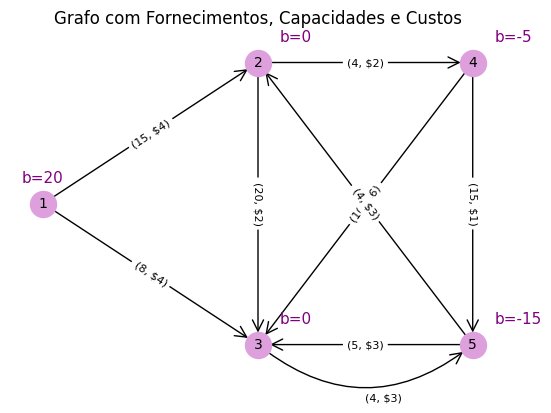

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar o grafo dirigido
grafo = nx.DiGraph()

# Adicionar nós com fornecimentos/demandas
fornecimentos = {1: 20, 2: 0, 3: 0, 4: -5, 5: -15}
for no in fornecimentos.keys():
    grafo.add_node(no)

# Adicionar arcos com capacidades e custos
arcos = [
    (1, 2, 15, 4),  # (nó origem, nó destino, capacidade, custo)
    (1, 3, 8, 4),
    (2, 3, 20, 2),
    (2, 4, 4, 2),
    (3, 5, 4, 3),  # Arco do nó 3 para 5 (curvado, externo)
    (4, 3, 10, 6),
    (4, 5, 15, 1),
    (5, 2, 4, 3),  # Arco do nó 5 para 2
    (5, 3, 5, 3),  # Arco do nó 5 para 3 (reto)
]

for u, v, capacidade, custo in arcos:
    grafo.add_edge(u, v, capacidade=capacidade, custo=custo)

# Posicionar os nós manualmente para refletir o desenho
posicoes = {
    1: (0, 2),
    2: (2, 4),
    3: (2, 0),
    4: (4, 4),
    5: (4, 0),
}

# Desenhar os nós
nx.draw_networkx_nodes(grafo, posicoes, node_size=350, node_color="plum")
nx.draw_networkx_labels(
    grafo,
    posicoes,
    labels={no: f"{no}" for no in grafo.nodes},  # Apenas o número do nó dentro do nó
    font_size=10,
)

# Adicionar fornecimentos/demandas fora dos nós
for no, fornecimento in fornecimentos.items():
    x, y = posicoes[no]
    plt.text(
        x - 0.2 if fornecimento > 0 else x + 0.2,  # Ajustar posição do texto
        y + 0.3,
        f"b={fornecimento}",
        fontsize=11,
        color="purple",
    )

# Desenhar as arestas
for u, v in grafo.edges():
    if (u, v) == (3, 5):  # Aresta do nó 3 para o nó 5 é curvada (externa)
        nx.draw_networkx_edges(
            grafo,
            posicoes,
            edgelist=[(u, v)],
            arrowstyle="->",
            arrowsize=20,
            edge_color="black",
            connectionstyle="arc3,rad=0.4",  # Curva superior externa
        )
        # Adicionar rótulo à aresta curvada manualmente
        mid_x = (posicoes[u][0] + posicoes[v][0]) / 2
        mid_y = (posicoes[u][1] + posicoes[v][1]) / 2 - 0.8  # Ajustar para exibir abaixo da curva
        plt.text(
            mid_x,
            mid_y,
            f"({grafo[u][v]['capacidade']}, ${grafo[u][v]['custo']})",
            fontsize=8,

        )
    else:  # Todas as outras arestas são retas
        nx.draw_networkx_edges(
            grafo,
            posicoes,
            edgelist=[(u, v)],
            arrowstyle="->",
            arrowsize=20,
            edge_color="black",
        )

# Adicionar rótulos às arestas retas (capacidade, custo)
nx.draw_networkx_edge_labels(
    grafo,
    posicoes,
    edge_labels={(u, v): f"({d['capacidade']}, ${d['custo']})" for u, v, d in grafo.edges(data=True) if (u, v) != (3, 5)},
    font_size=8,

)

# Exibir o grafo
plt.title("Grafo com Fornecimentos, Capacidades e Custos")
plt.axis("off")
plt.show()



In [ ]:
"""
Baseado no exemplo de Bradley, Hax e Maganti, 'Applied Mathematical Programming', figura 8.1.
Exemplo de fluxo de custo mínimo com a biblioteca OR-Tools.
"""

import numpy as np
from ortools.graph.python import min_cost_flow


def main():
    """Exemplo simples de interface MinCostFlow."""
    # Instanciar o resolvedor de Fluxo de Custo Mínimo.
    fluxo_custo_minimo = min_cost_flow.SimpleMinCostFlow()

    # Definir quatro arrays paralelos: fontes (nós iniciais), destinos (nós finais),
    # capacidades e custos unitários entre cada par.
    # Por exemplo, o arco do nó 0 para o nó 1 tem uma capacidade de 15.
    nos_iniciais = np.array([1, 1, 2, 2, 2, 3, 3, 4, 5])
    nos_finais = np.array([1, 2, 2, 3, 4, 3, 4, 4, 2])
    capacidades = np.array([15, 8, 20, 4, 10, 15, 4, 20, 5])
    custos_unitarios = np.array([4, 4, 2, 2, 6, 1, 3, 2, 3])

    start_nodes = np.array([0, 0, 1, 1, 1, 2, 2, 3, 4])
    end_nodes = np.array([1, 2, 2, 3, 4, 3, 4, 4, 2])
    capacities = np.array([15, 8, 20, 4, 10, 15, 4, 20, 5])
    unit_costs = np.array([4, 4, 2, 2, 6, 1, 3, 2, 3])

    # Definir um array de fornecimento (supply) para cada nó.
    fornecimentos = [20, 0, 0, -5, -15]

    # Adicionar os arcos, capacidades e custos em lote usando numpy.
    todos_arcos = fluxo_custo_minimo.add_arcs_with_capacity_and_unit_cost(
        nos_iniciais, nos_finais, capacidades, custos_unitarios
    )

    # Definir os fornecimentos para cada nó.
    fluxo_custo_minimo.set_nodes_supplies(np.arange(0, len(fornecimentos)), fornecimentos)

    # Resolver o problema de fluxo de custo mínimo.
    status = fluxo_custo_minimo.solve()

    if status != fluxo_custo_minimo.OPTIMAL:
        print("Houve um problema com a entrada do fluxo de custo mínimo.")
        print(f"Status: {status}")
        exit(1)

    # Exibir o custo mínimo total.
    print(f"Custo mínimo: {fluxo_custo_minimo.optimal_cost()}")
    print("")
    print(" Arco    Fluxo / Capacidade  Custo")

    # Obter os fluxos da solução e calcular os custos.
    fluxos_solucao = fluxo_custo_minimo.flows(todos_arcos)
    custos_totais = fluxos_solucao * custos_unitarios

    # Exibir a solução para cada arco.
    for arco, fluxo, custo in zip(todos_arcos, fluxos_solucao, custos_totais):
        print(
            f"{fluxo_custo_minimo.tail(arco):1} -> {fluxo_custo_minimo.head(arco)}  {fluxo:3}  / {fluxo_custo_minimo.capacity(arco):3}       {custo}"
        )


if __name__ == "__main__":
    main()

In [ ]:
from ortools.graph.python import min_cost_flow

def main():
    # Instanciar o resolvedor de Fluxo de Custo Mínimo
    fluxo_custo_minimo = min_cost_flow.SimpleMinCostFlow()

   # Nós iniciais e finais das arestas (arcos)
    nos_iniciais = [1, 1, 2, 2, 2, 3, 3, 4, 5]
    nos_finais = [2, 3, 3, 4, 5, 4, 5, 5, 3]

    # Capacidades de cada arco
    capacidades = [15, 8, 20, 4, 10, 15, 4, 20, 5]

    # Custos unitários de cada arco
    custos_unitarios = [4, 4, 2, 2, 6, 1, 3, 2, 3]

    # Fornecimento/demanda de cada nó
    fornecimentos = [20, 0, 0, -5, -15]





    # Adicionar arcos ao resolvedor
    fluxo_custo_minimo.add_arcs_with_capacity_and_unit_cost(
        nos_iniciais, nos_finais, capacidades, custos_unitarios
    )

    # Definir fornecimentos/demandas para cada nó
    fluxo_custo_minimo.set_nodes_supplies(range(1, 6), fornecimentos)

    # Resolver o problema
    status = fluxo_custo_minimo.solve()

    if status == fluxo_custo_minimo.OPTIMAL:
        print(f"Custo total mínimo: {fluxo_custo_minimo.optimal_cost()}\n")
        print("Fluxos nos arcos:")
        for arco in range(fluxo_custo_minimo.num_arcs()):
            fluxo = fluxo_custo_minimo.flow(arco)
            if fluxo > 0:  # Mostrar apenas arcos com fluxo positivo
                print(
                    f"Arco {fluxo_custo_minimo.tail(arco)} -> {fluxo_custo_minimo.head(arco)}: "
                    f"Fluxo = {fluxo}, Custo = {fluxo * fluxo_custo_minimo.unit_cost(arco)}"
                )
    else:
        print("Não foi possível encontrar uma solução.")

if __name__ == "__main__":
    main()


Custo total mínimo: 150

Fluxos nos arcos:
Arco 1 -> 2: Fluxo = 12, Custo = 48
Arco 1 -> 3: Fluxo = 8, Custo = 32
Arco 2 -> 3: Fluxo = 8, Custo = 16
Arco 2 -> 4: Fluxo = 4, Custo = 8
Arco 3 -> 4: Fluxo = 12, Custo = 12
Arco 3 -> 5: Fluxo = 4, Custo = 12
Arco 4 -> 5: Fluxo = 11, Custo = 22
